$\newcommand{\nc}{\newcommand}$
$\nc{\Nn}{\mathbb{N}}$
$\nc{\Qq}{\mathbb{Q}}$
$\nc{\Zz}{\mathbb{Z}}$
$\nc{\Rr}{\mathbb{R}}$
$\nc{\DMO}{\DeclareMathOperator}$
$\DMO{\dom}{dom}$
$\DMO{\rng}{rng}$

# Relations

## Relations

A **relation** is a triple $(X,Y,R)$ where $R$ is a subset of $X \times Y$. $R$ is called the **graph** of the relation.

We often refer to the relation by its graph and say that _"$R$ is a **relation from $X$ to $Y$** "_. 

A relation from $X$ to itself is called a **relation on** $X$.

**Examples.** $\emptyset$ and $X \times Y$ are relations from $X$ to $Y$.

Let $R$ be a relation from $X$ to $Y$. For $(a,b)$ in $R$, we think of _"$a$ is related to $b$ by $R$_".
or _"$a$ is in relation $R$ with $b$"_. 

Often we write $a R b$ for $(a,b) \in R$.

E.g. $(1,2) \in <$, and we often just write $1 < 2$.

The **domain** of $R$, $\dom R$, is the set $\{a \in X \colon \exists b \in Y, (a,b) \in R\}$ 

The **range** of $R$, $\rng R$, is the set $\{b \in Y \colon \exists a \in X, (a,b) \in R\}$.

E.g. $(x,y) \in F$ if and only if $y$ is the father of $x$. $X = People = Y$

**Example.** Let $X = \{0,1,2\}$ and $Y = \{a,b\}$. Then $R = \{(0,b),(2,a), (0,a)\}$ is a relation from $X$ to $Y$.

**Q.** What are the domain and the range of $R$?

**A.** $\dom R = \{0,2\}$ and $\rng R = \{a,b\}$

**Q.** Give an example from $X$ to $Y$ other than the one given above.

E.g. $S = \{(1,b), (1,a)\}$ is a relation from $X$ to $Y$ other than the given $R$.

**Q.** How many relations from $X$ to $Y$ are there?

**A.** $|P(X\times Y)| = 2^{|X \times Y|}  = 2^{|X||Y|}$.

**Example.** Consider the relation *divisible* on $\Zz$. We write $a\mid b$ if $b = ac$ for some $c \in \Zz$. 

So $3 \mid 6$ and $2 \mid 6$, $2 \not\mid 5$ and $5 \not\mid 2$. Both $-1 \mid 1$ and $1 \mid -1$.

**Example.** Let $R$ be the relation on $\Zz$ defined by $a R b$ if $a^2 = b^2$.

## Composition of Relations

Let $R \subseteq X \times Y$ and $S \subseteq Y \times Z$, then the **composition of $R$ and $S$** is the relation

$$
\{ (a,c) \in X \times Z \colon (a,b) \in R \text{ and } (b,c) \in S \text{ for some $b \in Y$.} \}
$$

This relation is denoted either by $RS$ or $S \circ R$. (see [ADS](http://faculty.uml.edu/klevasseur/ads/s-basic-definitions.html) for details).

 **Example.** Let $X = \{a,b,c\}$, $Y = \{0,1,2\}$ and $Z = \{\alpha, \beta, \gamma\}$.
 
 Let $R = \{(a,1), (b,1), (c,1), (c,2)\}$ and $S =\{(0,\alpha), (1,\beta), (2,\alpha)\}$.

**Q.** What is $S \circ R$? 

In [1]:
R = Set([('a',1),('b',1),('c',1),('c',2)]); S = Set([(0,'alpha'),(1,'beta'),(2,'alpha')])

In [2]:
def rel_comp(S,R):
    '''
    Return the composition SoR
    '''
    SoR = Set([(r,s) for (r,u) in R for (v,s) in S if u==v])
    return(SoR)

In [3]:
rel_comp(S,R)

{('c', 'beta'), ('a', 'beta'), ('b', 'beta'), ('c', 'alpha')}

## Identity and Inverse

The **identity relation** on $X$ (sometime called the **diagonal** of $X$ or the **equality** on $X$) is the relation
, denoted by $1_X$ or $\Delta_X$,

$$
\{(a,a) \colon a \in X\}.
$$

The **inverse** of a relation $R$ from $X$ to $Y$ is the relation

$$
R^{-1} = \{ (b,a) \colon (a,b) \in R \}.
$$

**Q.** How are $R \circ R^{-1}$, $R^{-1}\circ R$, $1_{\dom R}$ and $1_{\rng R}$ related?

## Laws of Composition

For $R \subseteq X \times Y, S \subseteq Y \times Z$ and $T \subseteq Z \times W$,

* $T\circ (S\circ R) = (T \circ S) \circ R$          (associative)
* $1_Y \circ R = R$ and $R \circ 1_X = R$            ($1_X,1_Y$ are identity of composition)

# Properties of Relations

Read this [section](http://faculty.uml.edu/klevasseur/ads/s-properties-of-relations.html) of ADS.

A relation $R$ on $X$ is

* **Reflexive** if $\forall x \in X$, $xRx$. That is, if $1_X \subseteq R$.

* **Symmetric** if $\forall x,y \in X$, $xRy$ if and only if $yRx$.
  That is, if $R^{-1} = R$.

* **Anti-symmetric** if $\forall x,y \in X$, ($xRy$ and $yRx$) $\implies x = y$. That is if $R \cap R^{-1} = 1_X$.

* **Transitive** if $\forall x,y,z \in X,\ xRy$ and $yRz \implies xRz$. That is if $R \circ R \subseteq R$.

**Exercise.** Show that a relation that is both symmetric and anti-symmetric is simply the equality of its domain.

Consequently, a relation on $X$ that is reflexive, symmetric and anti-symmetric must be just $1_X$ and hence transitive. 

In other words, the properties reflexive, symmetric and anti-symmetric together *implies* transitive.

## Diagrams: Graphical Representations of Relations

In [25]:
def rel_grph(domain,codomain,relation):
    G = DiGraph()
    pre_pos=graphs.CompleteBipartiteGraph(len(domain),len(codomain)).get_pos(); pos={}
    for (i,v) in enumerate(domain+codomain):
        G.add_vertex(v)
        pos[v]=pre_pos[i]
    G.add_edges(relation)
    return G, pos

A relation from $X$ to $Y$ can be represented by a directed graph (or diagram) with $X$ as one part and $Y$ as the other with arrows coming from elements of $X$ to elements of $Y$.

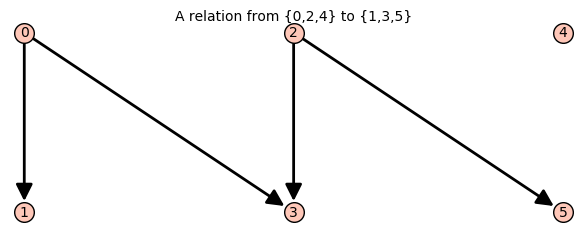

In [26]:
RG, position = rel_grph([0,2,4],[1,3,5],[(0,1),(0,3),(2,3),(2,5)]); 
RG.plot(pos=position, title='A relation from {0,2,4} to {1,3,5}')

It is clear that any such directed graph (diagram) determines a unique a relation from $X$ to $Y$. 

In [29]:
D = [0,2,4]; C = [1,3,5,7]; R = [(0,1),(0,5),(4,3),(2,3)]; 
RG2, p2 = rel_grph(C,D,R)

**Exercise.** Write down the relation corresponding to the following diagram.

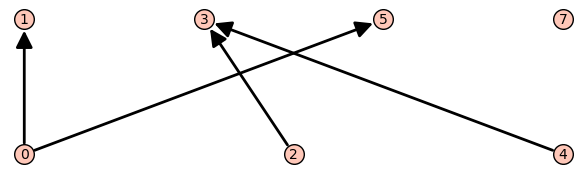

In [30]:
RG2.plot(pos=p2)

A relation on $X$ can be represented simply by a directed graph with elements of $X$ as vertices.

See this [page](http://faculty.uml.edu/klevasseur/ads/s-graphs-of-relations-on-a-set.html) for details.

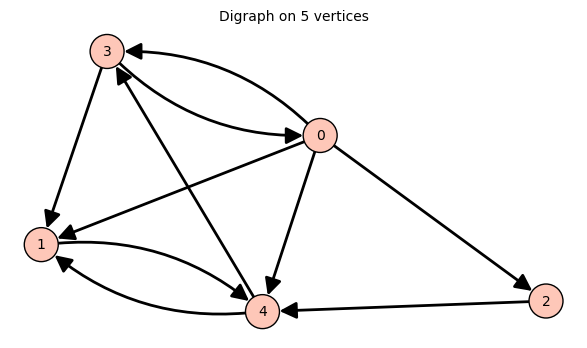

In [32]:
digraphs.RandomDirectedGNM(5,10)

**Exercise** Write down the relation on $\{0,1,2,3,4\}$ depicted by the above diagram.

Define refinement of relations here the next time.

Let $R'$ and $R$ be two relations on $X$ with the same domain. We say that $R'$ **refines** $R$ if $R' \subseteq R$. In other words, $R'$ refines $R$ if $a$,$b$ are $R$-related whenever they are $R'$-related.

**Ex.** Give a relation on $\{0,1,2,3\}$ that refines $\{(0,0),(0,2),(1,3),(3,2),(3,1)\}$.